## Problema 2: Europe countries security

En este ejercicio queremos comparar cómo de seguras son algunas de las ciudades de Europa: Italia, España, Dinamarca, Francia, Noruega, Finlandia y Portugal.

> Realizado por Jorge Vila Tomás.

### Importación de las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Carga de los datos

In [2]:
countries = ["Italy","Spain","Denmark","France","Norway","Finland","Portugal"]
back = plt.imread("europe_map.png")
map_coordinates = [-18.09,35.31,32.1,66.68]
coords = {'Italy': (11, 41), 
          'Spain': (-3,38), 
          'Denmark': (9,53),
          'France': (2, 44), 
          'Norway': (8,58), 
          'Finland': (25, 61), 
          'Portugal': (-9, 38)}

In [8]:
crimes = pd.read_csv('crim_gen.tsv', sep=',', na_values=': ')
crimes = crimes[crimes.country.isin(['IT','ES','DK','FR','NO','FI','PT'])]
crimes = crimes.replace(['IT','ES','DK','FR','NO','FI','PT'],
                        ["Italy","Spain","Denmark","France","Norway","Finland","Portugal"])
population = pd.read_csv('population_total.csv', sep=',', na_values=': ')
population = population[population.country.isin(["Italy","Spain","Denmark","France","Norway","Finland","Portugal"])]
crimes = crimes.set_index('country')
population = population.set_index('country')

In [9]:
type_crime = np.unique(list(crimes.iccs))
years = crimes.columns[2:]
population = population.sort_index()
crimes = crimes.sort_index()

In [10]:
total_crimes = crimes.query('iccs == "TOTAL"')
homicides = crimes.query('iccs == "HCIDE"')[years]
drugs = crimes.query('iccs == "DRUGT"')[years]
population = population[years]
total_crimes = total_crimes[years]

In [11]:
crimes.head()

,unit,iccs,2012,2011,2010,2009,2008,2007,2006,2005,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993
country,,,,,,,,,,,,,,,,,,,,,
Denmark,NR,DBURG,43480.0,45369.0,44788.0,48670.0,43974.0,36342.0,31204.0,29439.0,...,35557.0,32274.0,32846.0,34311.0,31463.0,34648.0,33502.0,32363.0,31864.0,35562.0
Denmark,NR,HCIDE,55.0,62.0,62.0,79.0,79.0,76.0,45.0,70.0,...,58.0,62.0,79.0,68.0,60.0,123.0,82.0,70.0,89.0,78.0
Denmark,NR,TOTAL,440772.0,466765.0,471088.0,491792.0,476953.0,445271.0,425093.0,432704.0,...,491511.0,473290.0,504231.0,494191.0,499167.0,531102.0,528488.0,538963.0,546926.0,546894.0
Denmark,NR,ROBBR,12709.0,13070.0,12802.0,12738.0,10747.0,5784.0,5048.0,5199.0,...,6033.0,5872.0,5915.0,5539.0,5008.0,4861.0,4368.0,4112.0,4171.0,4610.0
Denmark,NR,DRUGT,3662.0,3580.0,3297.0,2849.0,3237.0,3258.0,2917.0,2738.0,...,2675.0,2553.0,2527.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
crimes_2 = crimes.reset_index(level=0).drop(["unit"], axis=1)
crimes_2.head(1)

,country,iccs,2012,2011,2010,2009,2008,2007,2006,2005,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993
0,Denmark,DBURG,43480.0,45369.0,44788.0,48670.0,43974.0,36342.0,31204.0,29439.0,...,35557.0,32274.0,32846.0,34311.0,31463.0,34648.0,33502.0,32363.0,31864.0,35562.0


In [13]:
crimes_melt = crimes_2.melt(id_vars=["country", "iccs"], var_name="year")
crimes_melt.head()

,country,iccs,year,value
0,Denmark,DBURG,2012,43480.0
1,Denmark,HCIDE,2012,55.0
2,Denmark,TOTAL,2012,440772.0
3,Denmark,ROBBR,2012,12709.0
4,Denmark,DRUGT,2012,3662.0


### Salud de los datos

Antes de realizar cualquier análisis es conveniente comprobar la salud de los datos: cantidad de datos faltantes, outliers, cantidad de datos de cada clase que queremos estudiar, etc.

#### Datos faltantes

Una primera aproximación es representar la cantidad de valores faltantes que tenemos:

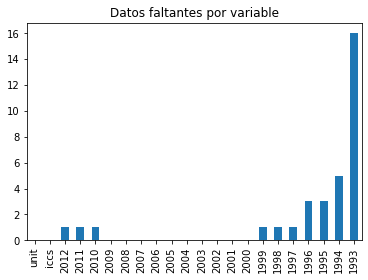

In [15]:
crimes.isna().sum().plot(kind="bar")
plt.title("Datos faltantes por variable")
plt.show()

Es una representación sencilla que muetras que, generalmente, los datos faltantes son los más antiguos. Esto tiene sentido ya que la cultura del dato es algo que se ha ido adquiriendo más recientemente. La pega de esta figura es que no nos da demasiada información sobre a qué se podrían deber estas ausencias de datos.

Si queremos ir un paso más allá, podemos buscar los datos faltantes en relación a los tipos de crímentes, el año y el país:

In [16]:
a = crimes_2.groupby(by=['country', 'iccs']).apply(lambda x: x.drop(["country", "iccs"], axis=1).isna().sum())

In [49]:
a_melt = a.reset_index().melt(id_vars=["country", "iccs"], var_name="year")

In [48]:
# plt.figure(figsize=(10,20))
# ax = plt.gca()
# plt.matshow(a, 0)
# plt.xticks(ticks=range(len(a.columns)), labels=a.columns, rotation=90)

# plt.yticks(ticks=range(len(a)), labels=list(a.index.levels[1])*len(a.index.levels[0]))
# plt.annotate("Patata", xy=(0,3), xytext=(-5,3))
# plt.show()

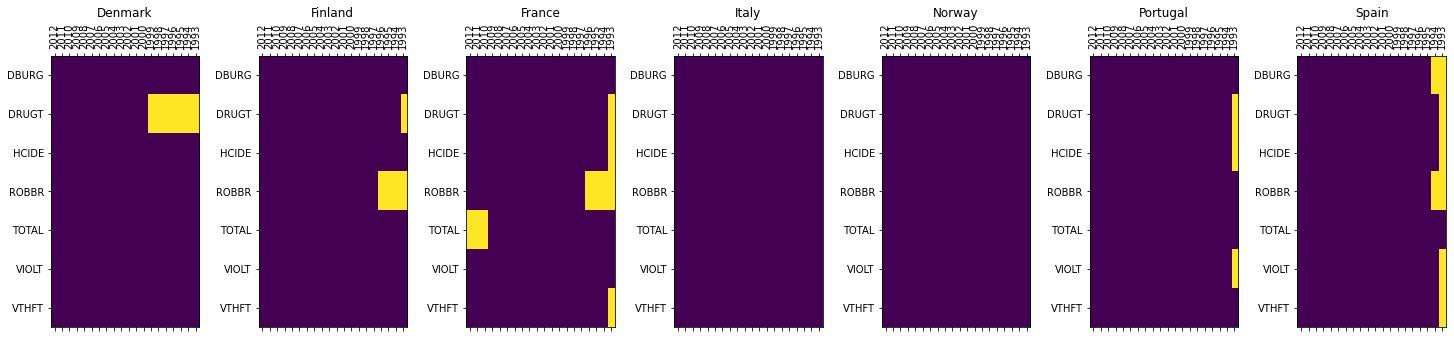

In [20]:
plt.figure(figsize=(25,5))
for i, country in enumerate(a.index.levels[0],1):
    plt.subplot(1,len(a.index.levels[0]),i)
    mat = a.loc[country]
    plt.matshow(mat, 0, aspect="auto")
    plt.xticks(ticks=range(len(mat.columns)), labels=mat.columns, rotation=90)
    plt.yticks(ticks=range(len(mat)), labels=list(a.index.levels[1]))
    plt.title(country)
    # break
plt.subplots_adjust(wspace=0.4)
# plt.savefig("NAs.png", dpi=300)
plt.show()

Llama especialmente la atención como en Francia, en 2012, falta el dato correspondiente a los crimenes totales pero tenemos todos los demás datos. A priori lo podríamos calcular sumando el resto, pero si investigamos un poco más podemos ver que `TOTAL` no parece ser la suma del resto de crimenes:

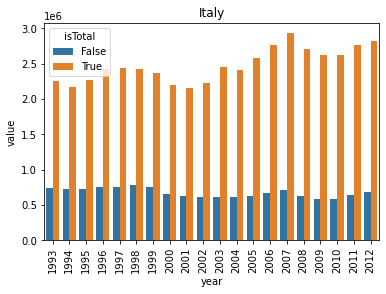

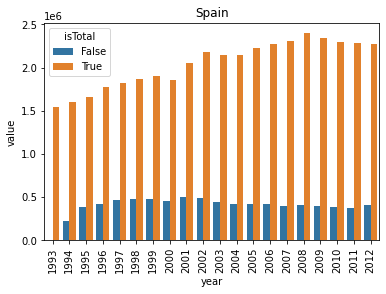

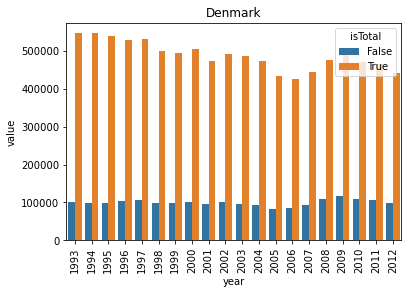

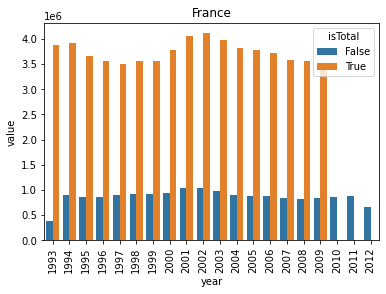

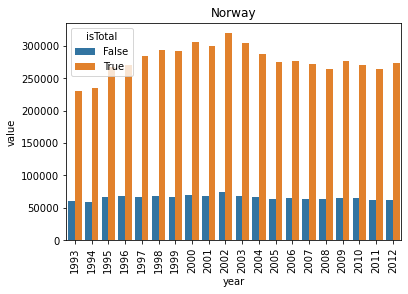

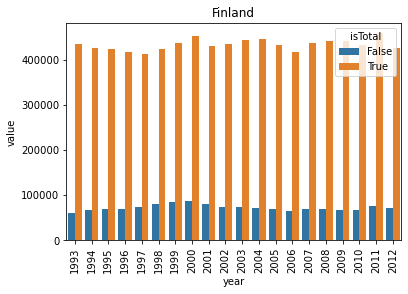

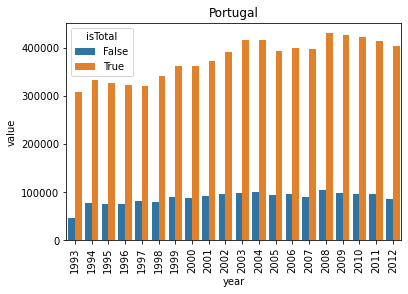

In [21]:
crimes_total = crimes.copy()
crimes_total["isTotal"] = crimes_total.iccs.apply(lambda x: x=='TOTAL')
for country in countries:
    cuac = crimes_total.loc[country].drop(["unit", "iccs"], axis=1).melt(id_vars=["isTotal"], var_name="year")

    sns.barplot(data=cuac.groupby(["year", "isTotal"]).sum().reset_index(), x="year", y="value", hue="isTotal")
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

Podemos representar el porcentaje de `TOTAL` que obtenemos sumando el resto de las categorías:

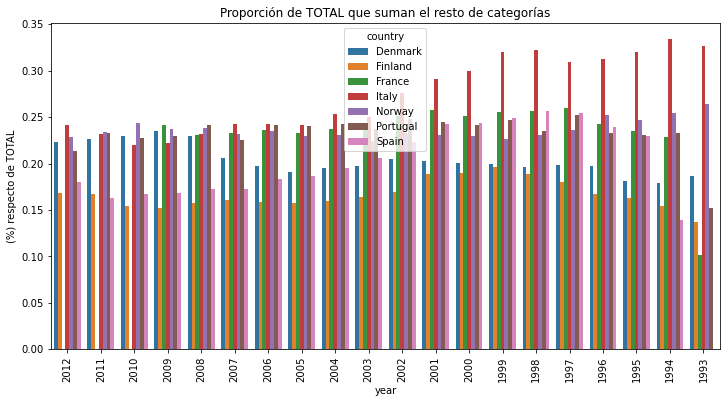

In [22]:
plt.figure(figsize=(12,6))
crimes_total \
    .groupby(by=['country', 'isTotal']) \
    .sum() \
    .reset_index() \
    .groupby(by=['country']) \
    .apply(lambda x: x.iloc[0]/x.iloc[1]) \
    .replace(to_replace=np.inf, value=np.nan) \
    .drop(columns=['isTotal']) \
    .reset_index() \
    .melt(id_vars=["country"], var_name="year") \
    .pipe((sns.barplot, 'data'), x='year', y='value', hue='country') \
    # .figure.set_size_inches(12,6) 
    

plt.xticks(rotation=90)
plt.title("Proporción de TOTAL que suman el resto de categorías")
plt.ylabel('(%) respecto de TOTAL')
plt.show()

Llama la atención ver que en ningún caso la suma de todas las demás categorías supera el 35% de la variable `TOTAL`. Esto requeriría de cierto análisis más profundo, pero la conclusión principal que sacamos es que se han omitido los datos de muchos otros tipos de crimen.

Como no tenemos clara la fiabilidad de los datos `TOTAL` y, además, nos faltan datos de esta categoría para los últimos años en Francia, procederemos al análisis únicamente con los datos de homicidios y drogas.

### Creación de variables

Si queremos comparar los datos entre los diferentes países no tiene sentido que lo hagamos utilizando los valores *raw*, ya que no estaríamos teniendo en cuenta las diferencias de población y no sería una comparación justa. Para solventarlo podemos utilizar, por ejemplo, los datos por millón de habitantes. 

> También vamos a reordenar las columnas del dataframe para que el tiempo crezca hacia la derecha de las figuras.

In [23]:
homicides_rel = (homicides / population) * 1000000
drugs_rel = (drugs / population) * 1000000

homicides_rel = homicides_rel.reindex(sorted(homicides_rel.columns), axis=1)
drugs_rel = drugs_rel.reindex(sorted(drugs_rel.columns), axis=1)

In [24]:
homicides_rel['iccs'] = 'HOMICIDES'
drugs_rel['iccs'] = 'DRUGS'

In [25]:
hom_drug_rel = pd.concat([homicides_rel, drugs_rel], axis=0)

In [26]:
homicides.reindex(sorted(homicides.columns), axis=1)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,
Denmark,78.0,89.0,70.0,82.0,123.0,60.0,68.0,79.0,62.0,58.0,82.0,60.0,70.0,45.0,76.0,79.0,79.0,62.0,62.0,55.0
Finland,130.0,147.0,146.0,156.0,139.0,113.0,143.0,148.0,156.0,132.0,103.0,144.0,113.0,112.0,128.0,132.0,116.0,112.0,116.0,89.0
France,NaN,1406.0,1336.0,1171.0,963.0,961.0,953.0,1051.0,1046.0,1119.0,987.0,990.0,976.0,879.0,826.0,839.0,682.0,675.0,743.0,430.0
Italy,1120.0,1008.0,1042.0,1001.0,924.0,918.0,854.0,818.0,765.0,691.0,765.0,767.0,648.0,663.0,685.0,654.0,626.0,567.0,583.0,563.0
Norway,38.0,33.0,42.0,43.0,38.0,38.0,33.0,48.0,37.0,46.0,51.0,36.0,33.0,33.0,30.0,34.0,29.0,29.0,111.0,27.0
Portugal,NaN,143.0,109.0,106.0,114.0,125.0,109.0,116.0,105.0,119.0,149.0,144.0,135.0,155.0,185.0,124.0,130.0,124.0,114.0,122.0
Spain,NaN,429.0,411.0,397.0,463.0,522.0,486.0,553.0,577.0,564.0,587.0,520.0,518.0,476.0,482.0,414.0,412.0,401.0,385.0,364.0


### Representación de los datos

La primera representación que podemos hacer es la de la evolución de los homicidios y los crimenes de drogas en el tiempo por país. Esto nos permitirá hacernos una idea de la seguridad de cada país.

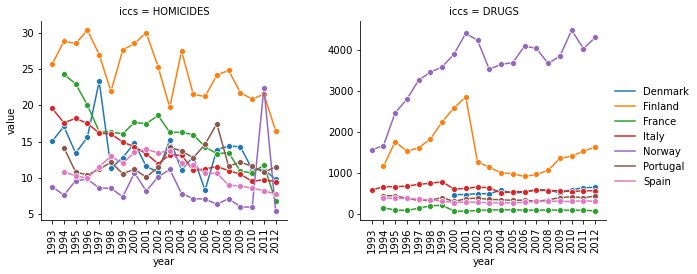

In [27]:
p = hom_drug_rel \
    .reset_index() \
    .melt(id_vars=['country', 'iccs'], var_name='year') \
    .pipe((sns.FacetGrid, 'data'), col='iccs', sharey=False) \
    .map_dataframe(sns.lineplot, x='year', y='value', hue='country', marker='o')

for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

p.figure.set_size_inches((9,4))
p.add_legend()
plt.show()

Vemos que aparece un pico en los homicidios de Noruega del 2011, esto se debe a unos atentados que tuvieron lugar en el país.

En general, vemos como la tendencia de todos los países es a la disminución de los homicidios, aunque llama la atención ver que recientemente están aumentando los casos de crímenes de drogas en Noruega y Finlandia. Podemos eliminar ahora estos países para poder ver en detalle el comportamiento del resto:

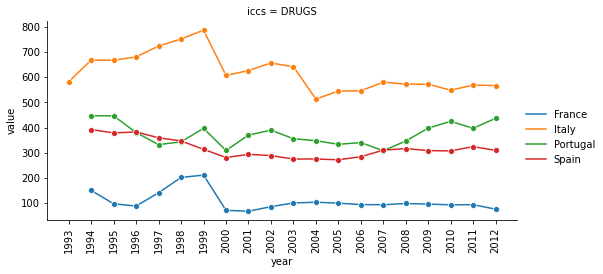

In [83]:
p = hom_drug_rel.query('country!=["Denmark", "Norway", "Finland"] & iccs=="DRUGS"') \
    .reset_index() \
    .melt(id_vars=['country', 'iccs'], var_name='year') \
    .pipe((sns.FacetGrid, 'data'), col='iccs', sharey=False) \
    .map_dataframe(sns.lineplot, x='year', y='value', hue='country', marker='o')

for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

p.figure.set_size_inches((9,4))
p.add_legend()
plt.show()

Esta última representación nos deja ver que en Portugal también está habiendo un repunte de casos de drogas, mientras que el resto de países se han estabilizado bastante.

Para terminar podemos representar también los crimenes de cada país en un diagrama de barras apilado que nos permita ver la proporción de cada crímen que se produce en cada país. En general, en las representaciones anteriores (lineas) es sencillo comparar tendencias pero no tan sencillo comparar proporciones. Esta representación nos sirve para complementarla:

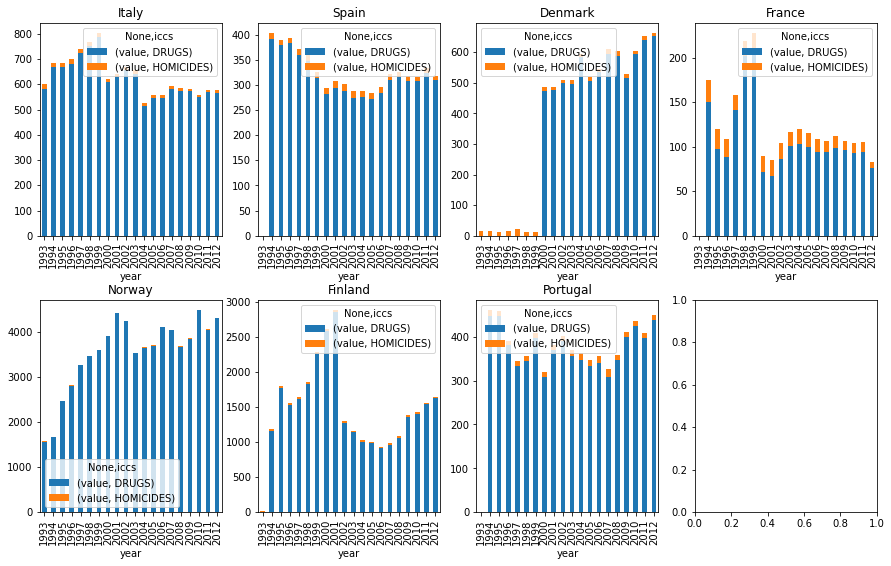

In [47]:
fig, ax = plt.subplots(2, 4, figsize=(15,9))
ax = ax.ravel()
for i, c in enumerate(countries):
    hom_drug_rel.query(f'country=="{c}"') \
        .reset_index() \
        .melt(id_vars=['country', 'iccs'], var_name='year') \
        .drop('country', axis=1) \
        .pivot(index='year', columns=['iccs']) \
        .plot.bar(stacked=True, title=c, ax=ax[i])
plt.subplots_adjust(hspace=0.3)
plt.show()

Donde vemos que, en general, la mayor parte de los crímenes que se producen en cualquiera de estos países están relacionados con las drogas, siendo Francia el país dónde mayor proporción de homicidios respecto a drogas observamos.

Para terminar con el análisis podemos representar los crimenes del último año en un mapa, que es una forma muy apropiada de mostrar la información georeferenciada al público general.

In [69]:
df_map_drugs = hom_drug_rel.iloc[:,-2:].query('iccs=="DRUGS"').drop('iccs', axis=1)
df_map_hom = hom_drug_rel.iloc[:,-2:].query('iccs=="HOMICIDES"').drop('iccs', axis=1)

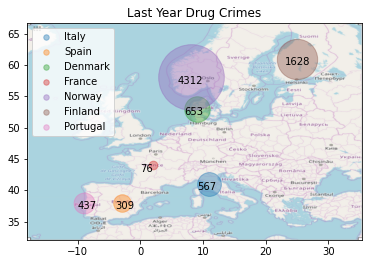

In [110]:
plt.figure()
plt.imshow(back, extent=map_coordinates)
for name, coord in coords.items():
    plt.scatter(*coord, s=df_map_drugs.loc[name], alpha=0.4, label=name)
    coord = np.array(coord)
    coord[0] = coord[0] - 1.1
    coord[1] = coord[1] - 0.5
    plt.text(*coord, f'{df_map_drugs.loc[name].tolist()[0]:.0f}')
    legend = plt.legend()
for lgndh in legend.legendHandles:
    lgndh._sizes = [30]
plt.title('Last Year Drug Crimes')
plt.show()

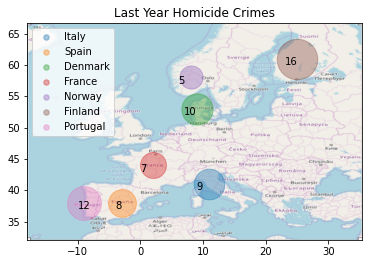

In [113]:
plt.figure()
plt.imshow(back, extent=map_coordinates)
for name, coord in coords.items():
    plt.scatter(*coord, s=df_map_hom.loc[name]*100, alpha=0.4, label=name)
    coord = np.array(coord)
    coord[0] = coord[0] - 1.1
    coord[1] = coord[1] - 0.5
    plt.text(*coord, f'{df_map_hom.loc[name].tolist()[0]:.0f}')
    legend = plt.legend()
for lgndh in legend.legendHandles:
    lgndh._sizes = [30]
plt.title('Last Year Homicide Crimes')
plt.show()

**Basándonos en todo el análisis que hemos realizado, podríamos decir que los países más seguros de Europa son Francia y España.**